Временной ряд

In [1]:
from DataLoaders.DataLoaderWrapper import DataLoaderWrapper
import pandas as pd

wrapper = DataLoaderWrapper(period = 'pre', do_scale = True)
pre_data = wrapper.get_data()

wrapper = DataLoaderWrapper(period = 'post', do_scale = True)
post_data = wrapper.get_data()

In [2]:
pre_data.set_index('Date', inplace = True)

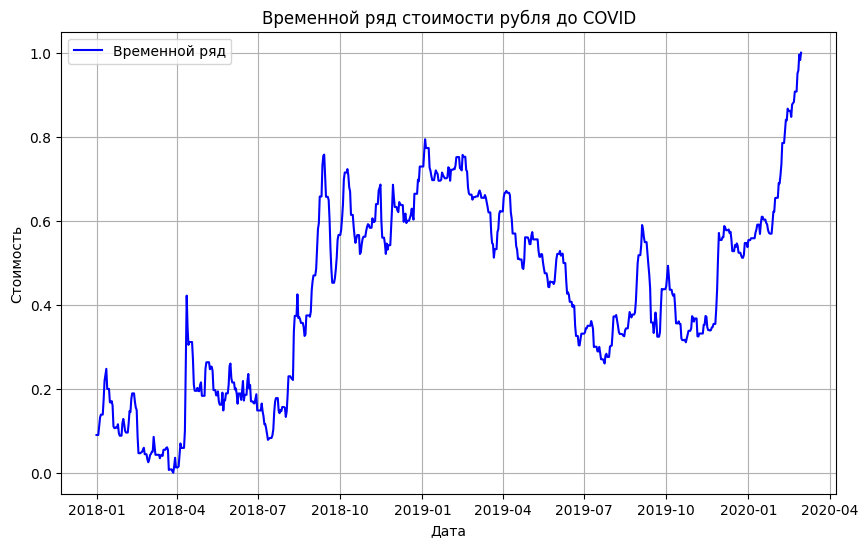

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(pre_data.index, pre_data['Cost'], label = 'Временной ряд', color = 'blue')

plt.title('Временной ряд стоимости рубля до COVID')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
post_data.set_index('Date', inplace = True)

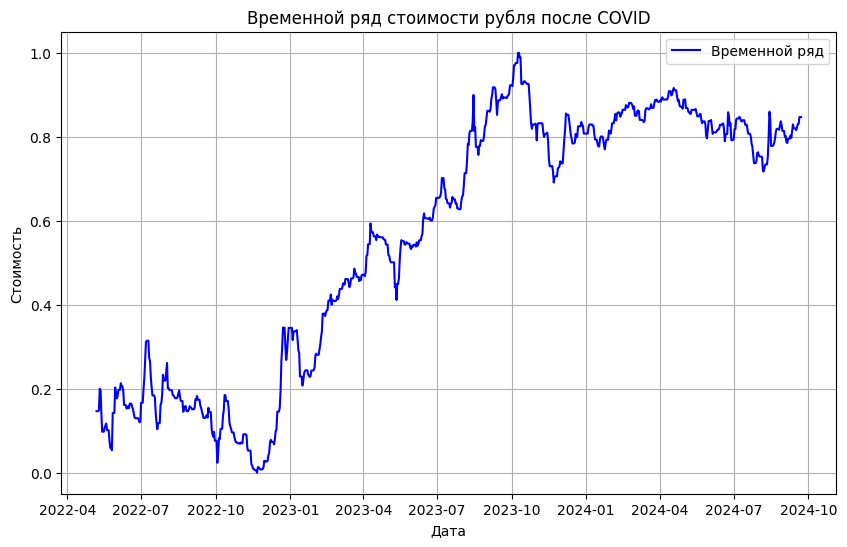

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(post_data.index, post_data['Cost'], label = 'Временной ряд', color = 'blue')

plt.title('Временной ряд стоимости рубля после COVID')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend()
plt.grid(True)
plt.show()

Тест Дики-Фуллера №1

In [6]:
from statsmodels.tsa.stattools import adfuller

pre_adf_test_orig = adfuller(pre_data)
print(f'p-value: {pre_adf_test_orig[1]}')

p-value: 0.8544376821772193


In [7]:
post_adf_test_orig = adfuller(post_data)
print(f'p-value: {post_adf_test_orig[1]}')

p-value: 0.7533213989971171


Автокорреляционная функция

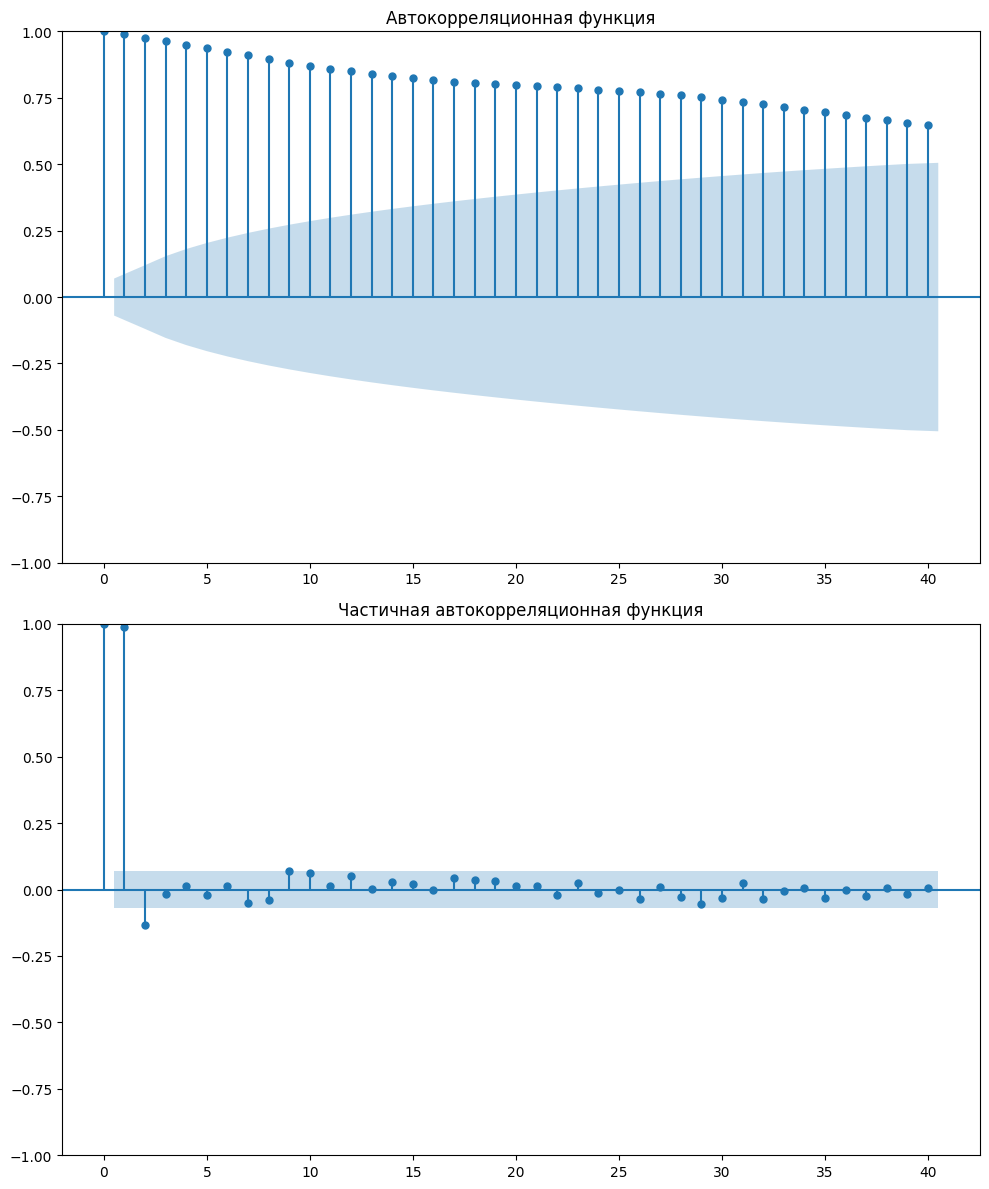

In [9]:
from DrawingSystem.AutocorrelationDrawer import AutocorrelationDrawer

pre_acf_drawer = AutocorrelationDrawer()

pre_acf_drawer.set_data(pre_data['Cost'])
pre_acf_drawer.plot()

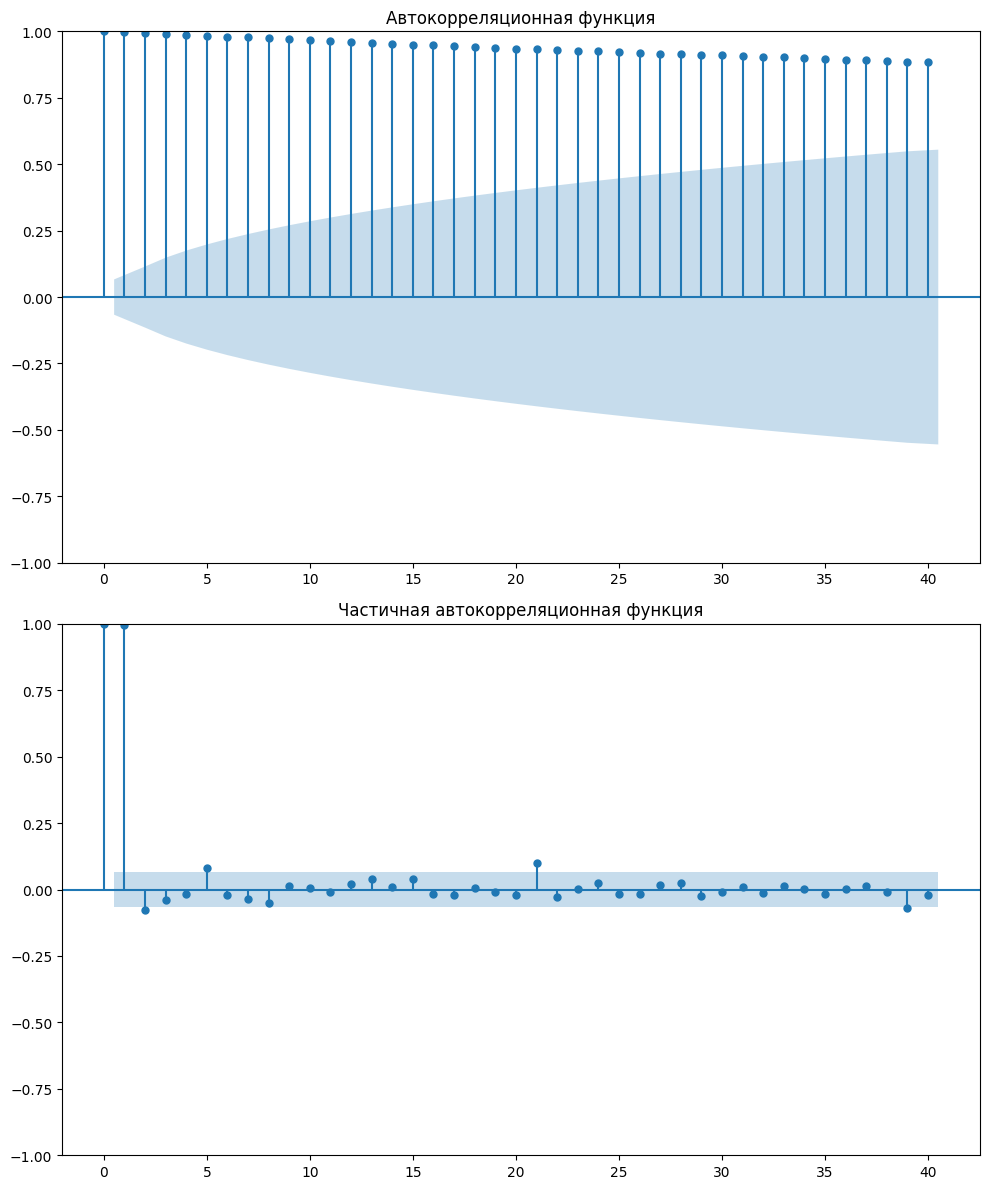

In [10]:
post_acf_drawer = AutocorrelationDrawer()

post_acf_drawer.set_data(post_data['Cost'])
post_acf_drawer.plot()

Дифференцирование

In [11]:
pre_diff_data = pre_data.diff()
pre_diff_data = pre_diff_data.dropna()

pre_diff_data.isna().sum()

Cost    0
dtype: int64

In [12]:
post_diff_data = post_data.diff()
post_diff_data = post_diff_data.dropna()

post_diff_data.isna().sum()

Cost    0
dtype: int64

Тест Дики-Фуллера №2

In [13]:
from statsmodels.tsa.stattools import adfuller

pre_adf_test_diff = adfuller(pre_diff_data)
print(f'p-value: {pre_adf_test_diff[1]}')

p-value: 1.7716293538025146e-16


In [14]:
post_adf_test_diff = adfuller(post_diff_data)
print(f'p-value: {post_adf_test_diff[1]}')

p-value: 6.108393862003413e-27


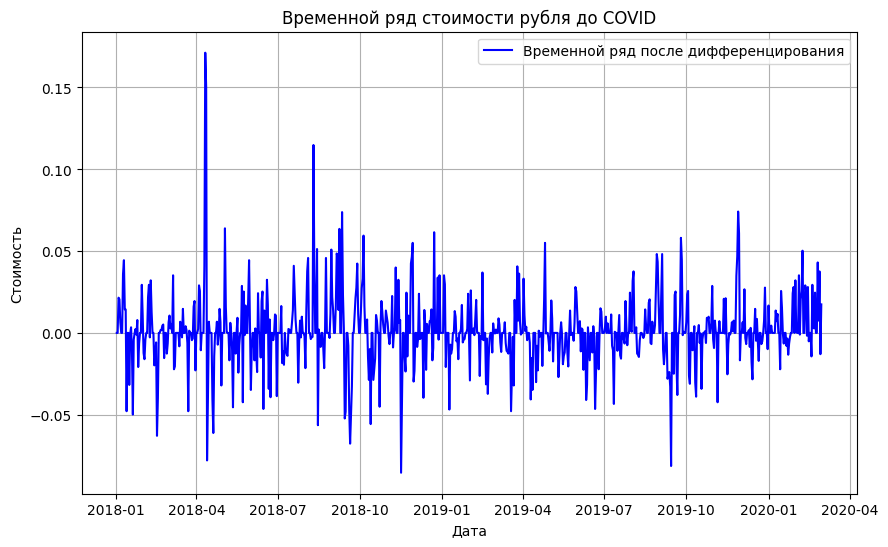

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(pre_diff_data['Cost'], label = 'Временной ряд после дифференцирования', color = 'blue')  #alpha = ...

plt.title('Временной ряд стоимости рубля до COVID')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend()
plt.grid(True)
plt.show()

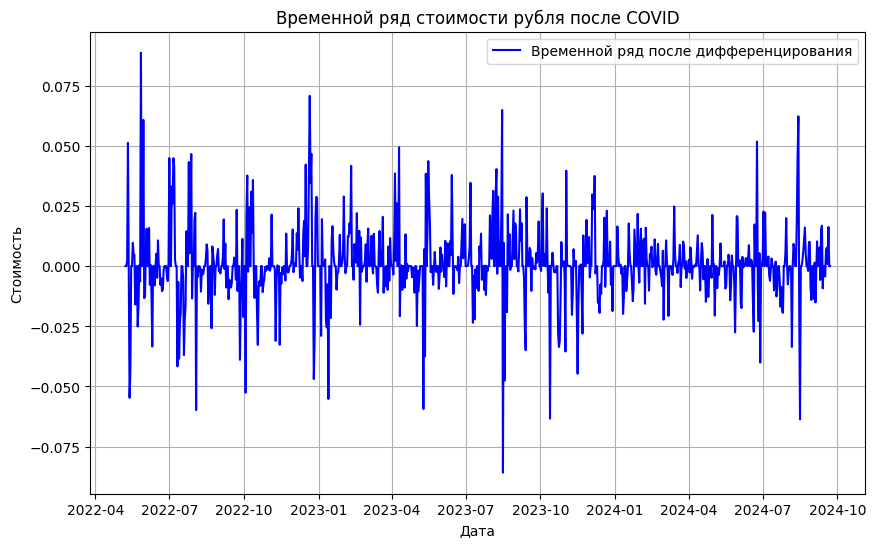

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(post_diff_data['Cost'], label = 'Временной ряд после дифференцирования', color = 'blue')  #alpha = ...

plt.title('Временной ряд стоимости рубля после COVID')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend()
plt.grid(True)
plt.show()

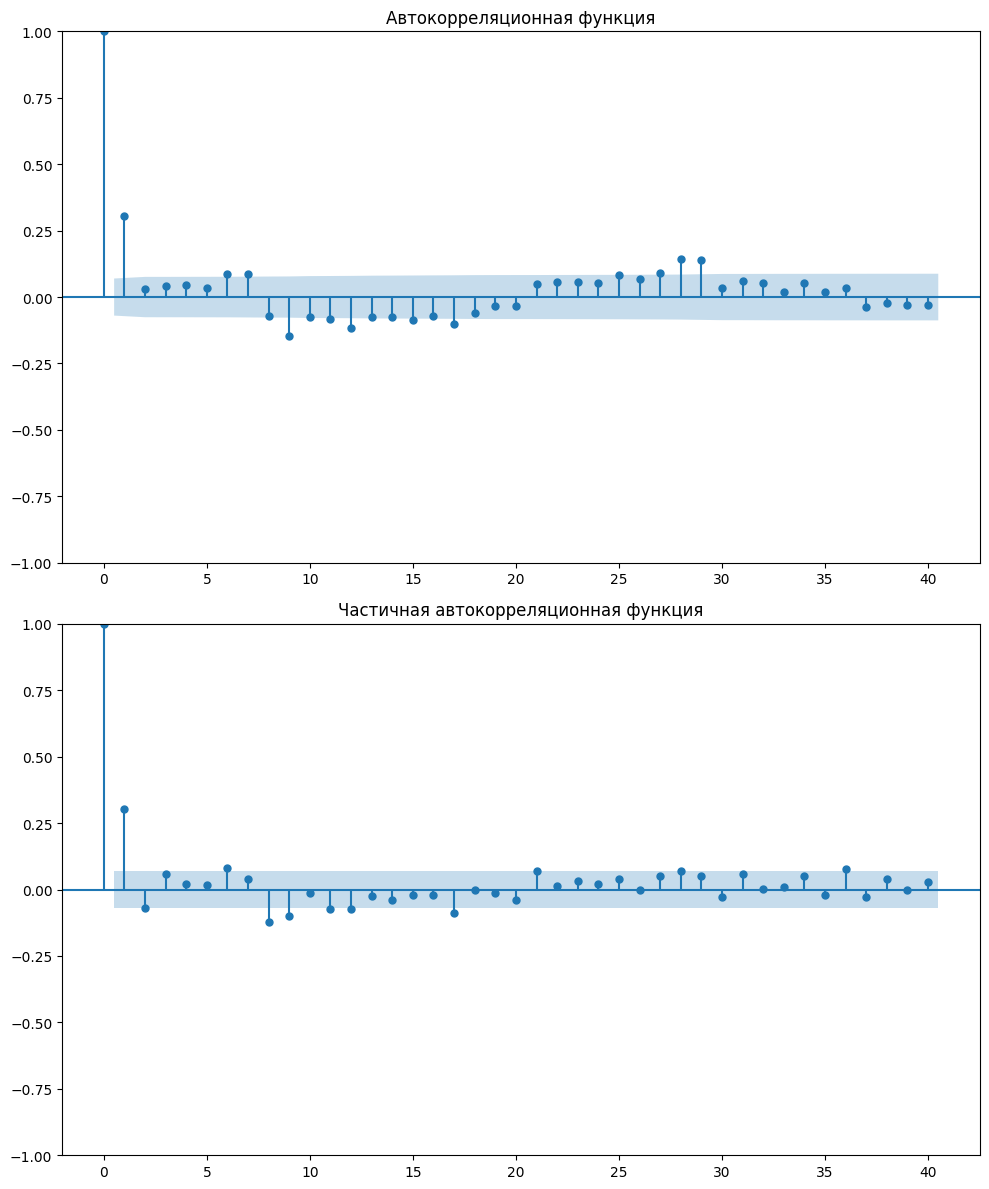

In [17]:
from DrawingSystem.AutocorrelationDrawer import AutocorrelationDrawer

pre_diff_acf_drawer = AutocorrelationDrawer()

pre_diff_acf_drawer.set_data(pre_diff_data['Cost'])
pre_diff_acf_drawer.plot()

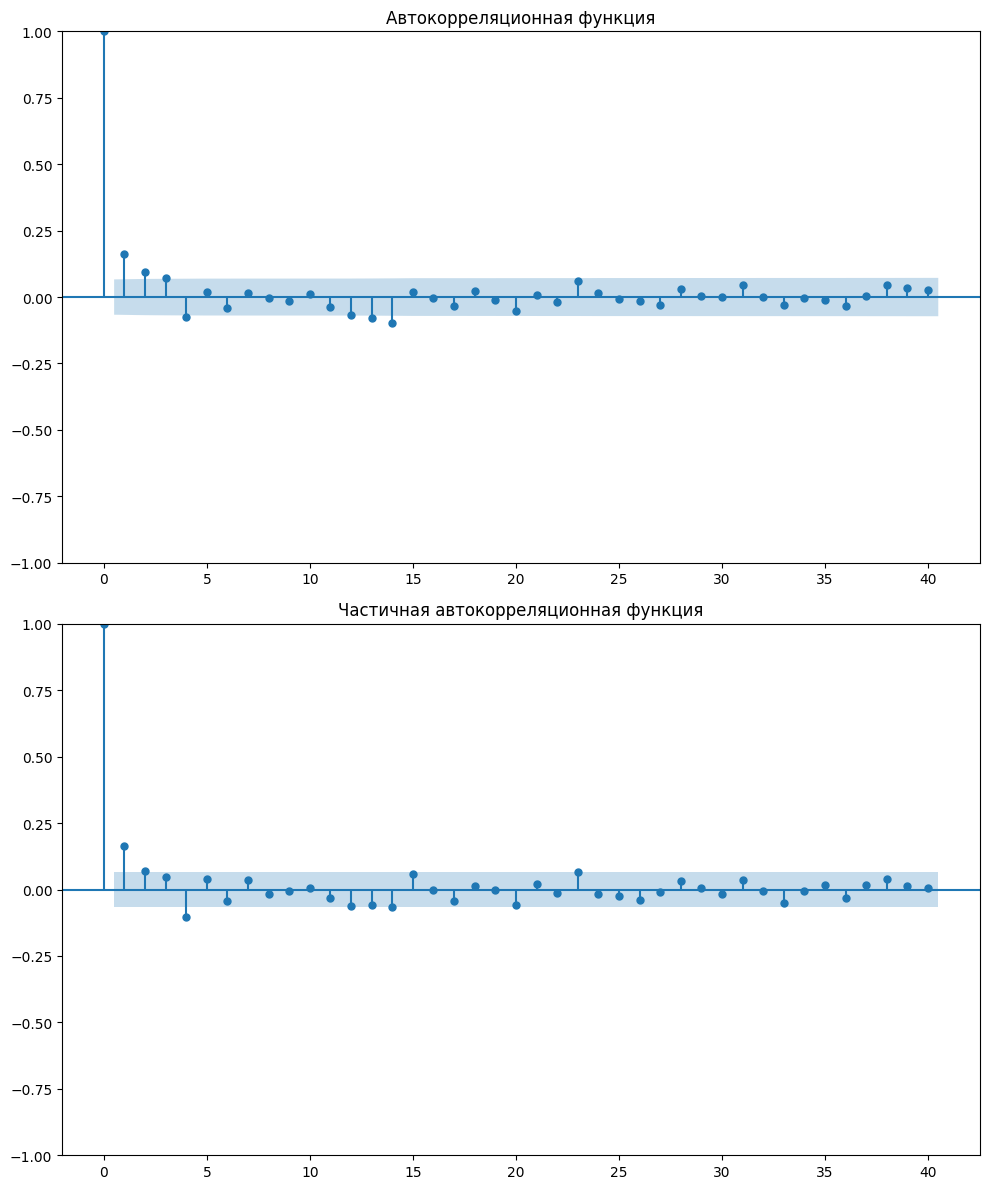

In [18]:
post_diff_acf_drawer = AutocorrelationDrawer()

post_diff_acf_drawer.set_data(post_diff_data['Cost'])
post_diff_acf_drawer.plot()

-----------------

Forecast

In [19]:
import numpy as np
import pandas as pd

y_test_pre = np.load('C:\\project\\y_test(1).npy').ravel()
y_train_pre = np.load('C:\\project\\y_train(1).npy').ravel()
predicted_values_pre = np.load('C:\\project\\predicted_values(1).npy').ravel()

y_test_post = np.load('C:\\project\\y_test.npy').ravel()
y_train_post = np.load('C:\\project\\y_train.npy').ravel()
predicted_values_post = np.load('C:\\project\\predicted_values.npy').ravel()

# print(data.shape)
# print(data)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

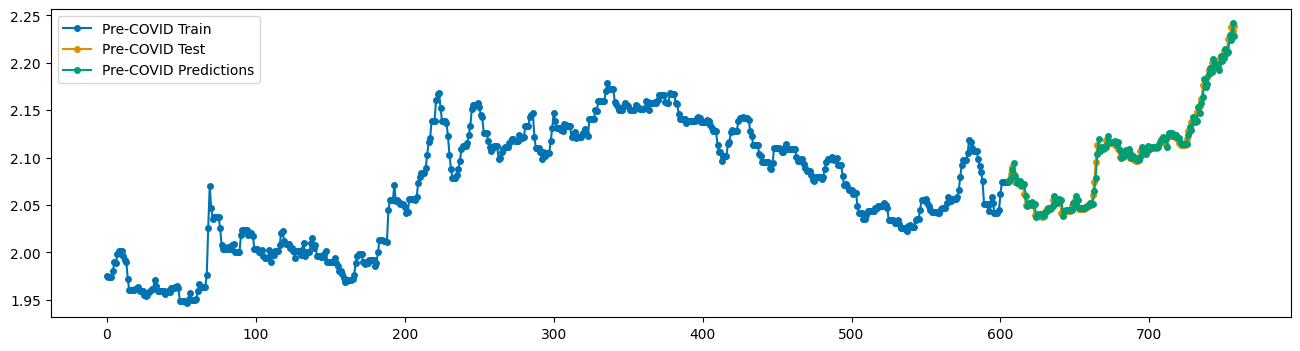

In [22]:
from sktime.utils.plotting import plot_series

df_train_pre = pd.Series(y_train_pre)
df_test_pre = pd.Series(y_test_pre, index = np.arange(len(y_train_pre), len(y_train_pre) + len(y_test_pre)))
y_pred_pre = pd.Series(predicted_values_pre, index = np.arange(len(y_train_pre), len(y_train_pre) + len(predicted_values_pre)))

plot_series(df_train_pre, df_test_pre, y_pred_pre, labels=['Pre-COVID Train', 'Pre-COVID Test', 'Pre-COVID Predictions'])


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

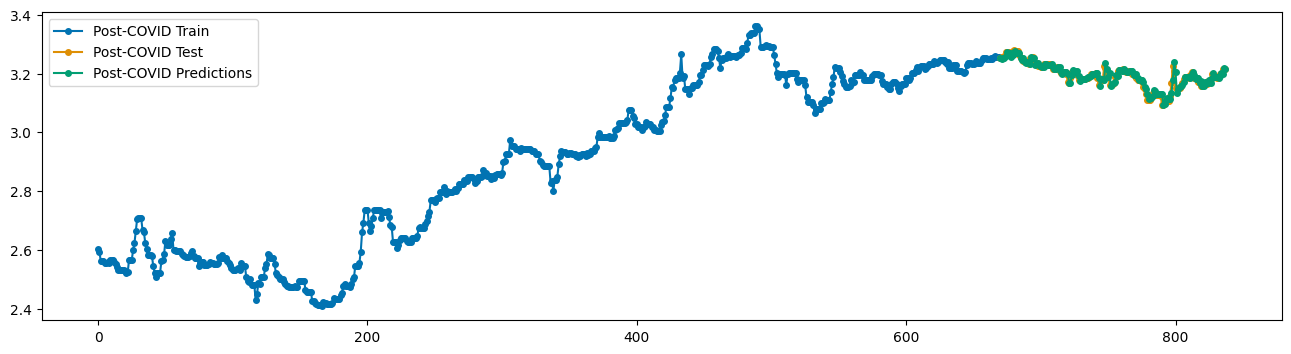

In [23]:
df_train_post = pd.Series(y_train_post)
df_test_post = pd.Series(y_test_post, index=np.arange(len(y_train_post), len(y_train_post) + len(y_test_post)))
y_pred_post = pd.Series(predicted_values_post, index=np.arange(len(y_train_post), len(y_train_post) + len(predicted_values_post)))

plot_series(df_train_post, df_test_post, y_pred_post, labels=['Post-COVID Train', 'Post-COVID Test', 'Post-COVID Predictions'])

Второй вариант

In [24]:
from DrawingSystem.ForecastDrawer import ForecastDrawer
import numpy as np

x_train_pre = np.arange(len(y_train_pre))  
x_test_pre = np.arange(len(y_train_pre), len(y_train_pre) + len(y_test_pre)) 

x_train_post = np.arange(len(y_train_post))  
x_test_post = np.arange(len(y_train_post), len(y_train_post) + len(y_test_post))

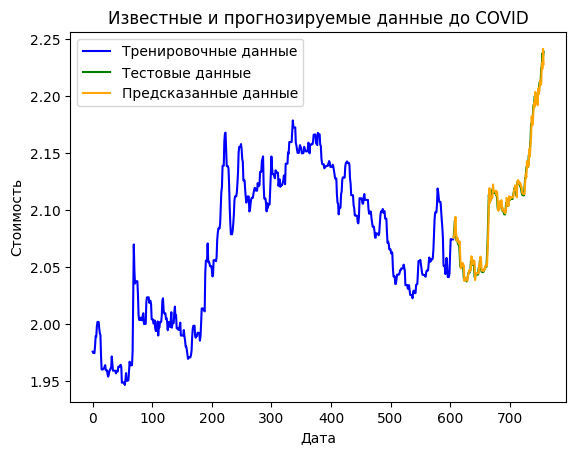

In [6]:
pre_forecast_drawer = ForecastDrawer()

pre_forecast_drawer.add_known_data(x_train_pre, y_train_pre, label = "Тренировочные данные")

pre_forecast_drawer.add_forecast_data(
    x_test_pre, y_test_pre, "Тестовые данные", 
    x_test_pre, predicted_values_pre, "Предсказанные данные"
)

pre_forecast_drawer.plot()


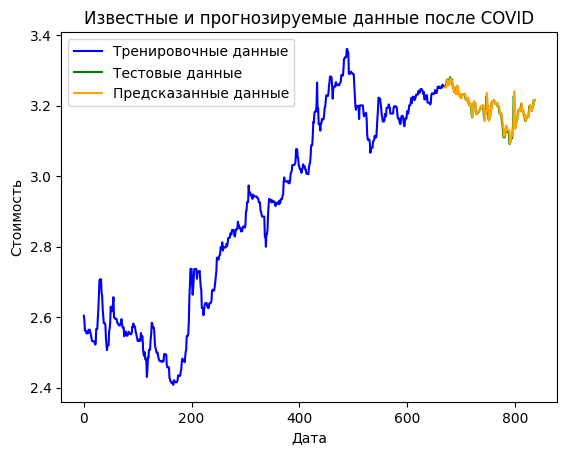

In [4]:
post_forecast_drawer = ForecastDrawer()

post_forecast_drawer.add_known_data(x_train_post, y_train_post, label = "Тренировочные данные")

post_forecast_drawer.add_forecast_data(
    x_test_post, y_test_post, "Тестовые данные", 
    x_test_post, predicted_values_post, "Предсказанные данные"
)

post_forecast_drawer.plot()

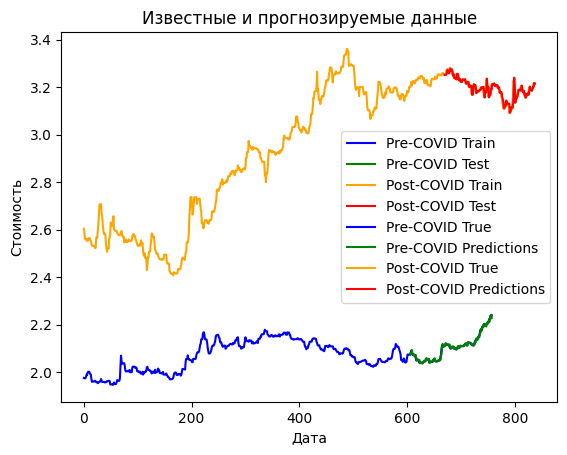

In [5]:
forecast_drawer.add_forecast_data(
    x_test_pre, y_test_pre, "Pre-COVID True", 
    x_test_pre, predicted_values_pre, "Pre-COVID Predictions"
)

forecast_drawer.add_forecast_data(
    x_test_post, y_test_post, "Post-COVID True", 
    x_test_post, predicted_values_post, "Post-COVID Predictions"
)
forecast_drawer.plot()

-------

Графики остатков

In [25]:
import numpy as np

y_test_pre = np.load('C:\\project\\y_test(1).npy').ravel()
y_train_pre = np.load('C:\\project\\y_train(1).npy').ravel()
predicted_values_pre = np.load('C:\\project\\predicted_values(1).npy').ravel()

y_test_post = np.load('C:\\project\\y_test.npy').ravel()
y_train_post = np.load('C:\\project\\y_train.npy').ravel()
predicted_values_post = np.load('C:\\project\\predicted_values.npy').ravel()

d:\FIN_N_PROJECT\UDSpredictor\src\DrawingSystem\ResidueDrawer.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = axs[0].scatter(x_true, residue, color = 'blue' , cmap = cmap)


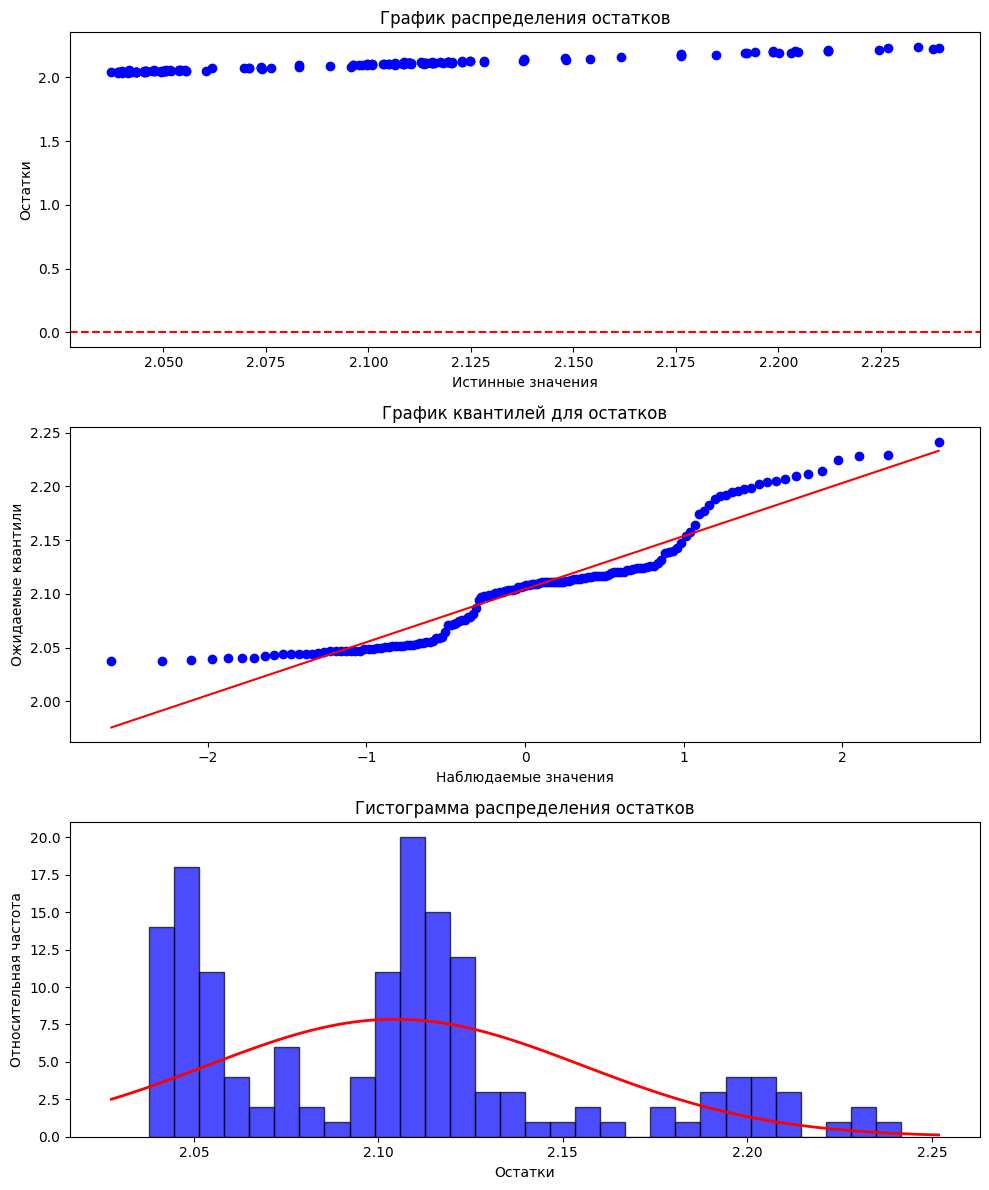

In [2]:
from DrawingSystem.ResidueDrawer import ResidueDrawer

pre_residue_drawer = ResidueDrawer()
pre_residue_drawer.add_residue(y_test_pre, predicted_values_pre)
pre_residue_drawer.plot()

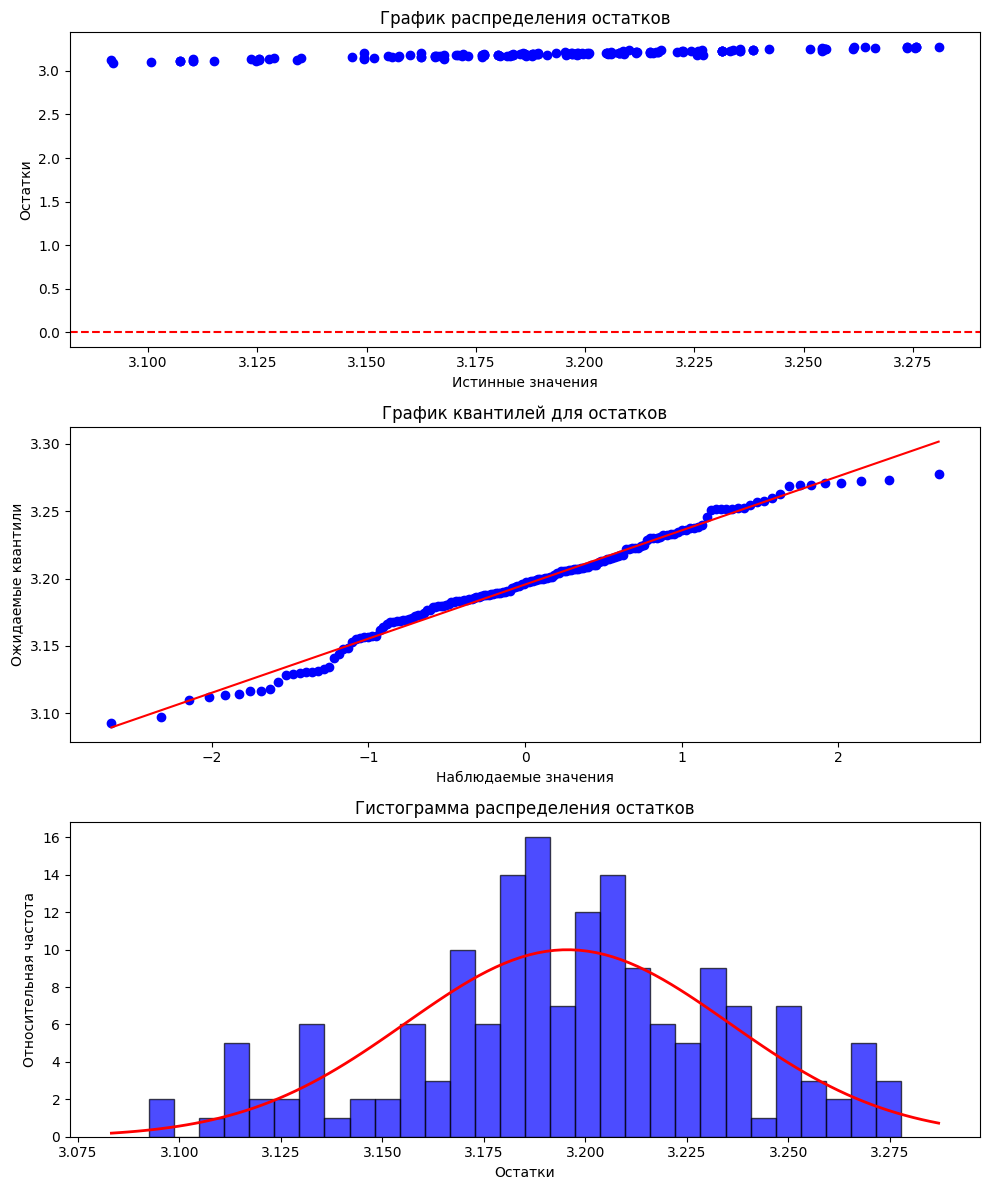

In [3]:
post_residue_drawer = ResidueDrawer()
post_residue_drawer.add_residue(y_test_post, predicted_values_post)
post_residue_drawer.plot()

Второй способ

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y_test_pre = np.load('C:\\project\\y_test(1).npy').ravel()
predicted_values_pre = np.load('C:\\project\\predicted_values(1).npy').ravel()

y_test_post = np.load('C:\\project\\y_test.npy').ravel()
predicted_values_post = np.load('C:\\project\\predicted_values.npy').ravel()

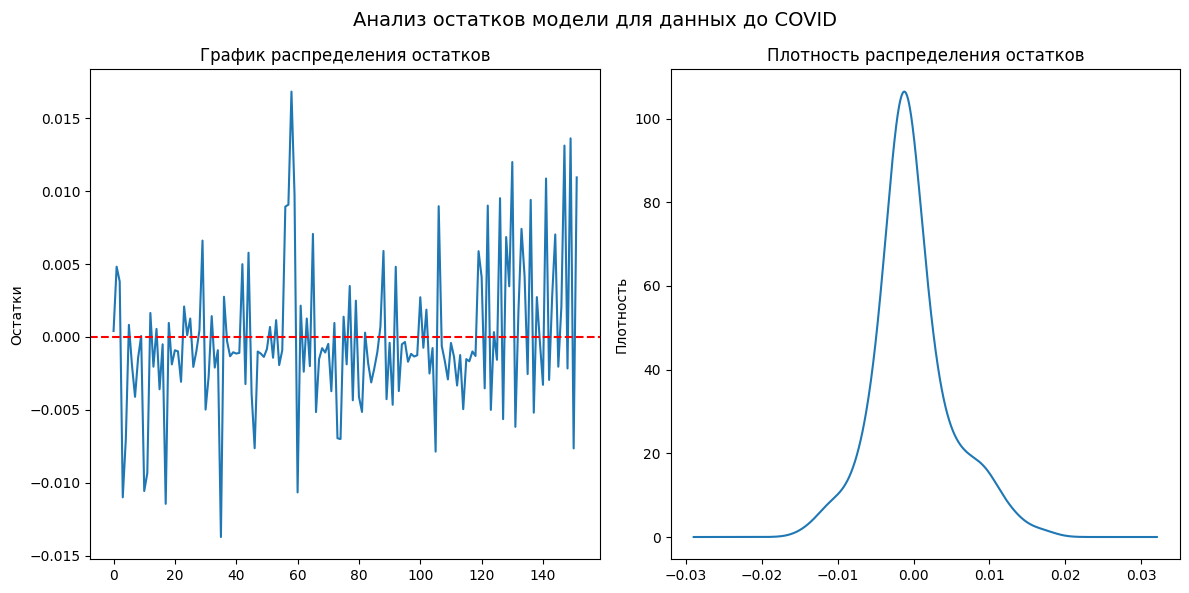

In [27]:
residuals_pre = y_test_pre - predicted_values_pre
residuals_pre_series = pd.Series(residuals_pre)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

residuals_pre_series.plot(title = 'График распределения остатков', ax = ax[0])

ax[0].axhline(0, color = 'red', linestyle = '--')
# ax[0].set_xlabel('Индекс')
ax[0].set_ylabel('Остатки')


residuals_pre_series.plot(title = 'Плотность распределения остатков', kind = 'kde', ax = ax[1])
#ax[1].set_xlabel('Остатки')
ax[1].set_ylabel('Плотность')

fig.suptitle('Анализ остатков модели для данных до COVID', fontsize = 14)

plt.tight_layout()
plt.show()


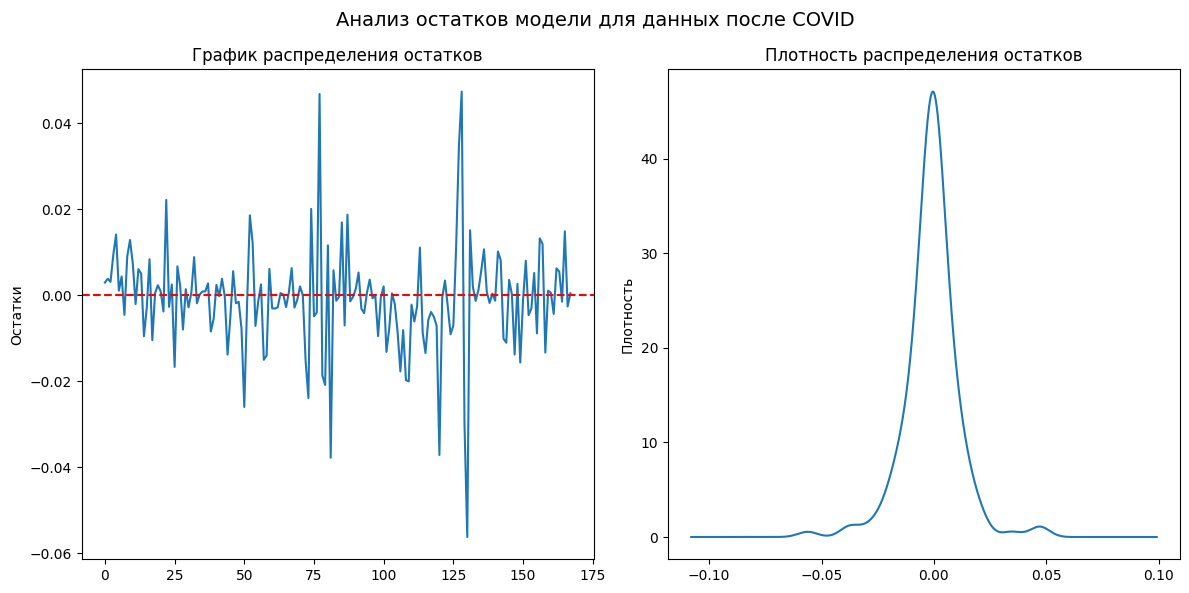

In [28]:
residuals_post = y_test_post - predicted_values_post
residuals_post_series = pd.Series(residuals_post)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

residuals_post_series.plot(title = 'График распределения остатков', ax = ax[0])

ax[0].axhline(0, color = 'red', linestyle = '--')
# ax[0].set_xlabel('Индекс')
ax[0].set_ylabel('Остатки')


residuals_post_series.plot(title = 'Плотность распределения остатков', kind = 'kde', ax = ax[1])
#ax[1].set_xlabel('Остатки')
ax[1].set_ylabel('Плотность')

fig.suptitle('Анализ остатков модели для данных после COVID', fontsize = 14)

plt.tight_layout()
plt.show()


ЕЩЕ ГРАФИКИ

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y_test_pre = np.load('C:\\project\\y_test(1).npy').ravel()
predicted_values_pre = np.load('C:\\project\\predicted_values(1).npy').ravel()

y_test_post = np.load('C:\\project\\y_test.npy').ravel()
predicted_values_post = np.load('C:\\project\\predicted_values.npy').ravel()

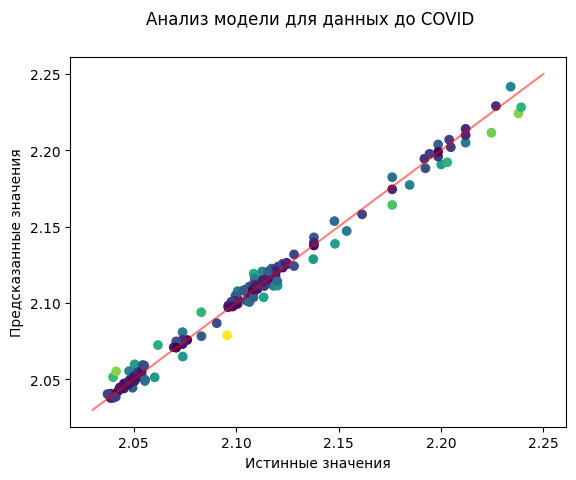

In [30]:
plt.plot(np.arange(2.03, 2.25125, 0.01), np.arange(2.03, 2.25125, 0.01), c = 'red', alpha = 0.5)

plt.scatter(y_test_pre, predicted_values_pre, 
            c = np.abs(y_test_pre - predicted_values_pre), cmap = 'viridis')

plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.suptitle("Анализ модели для данных до COVID", fontsize = 12)
plt.show()


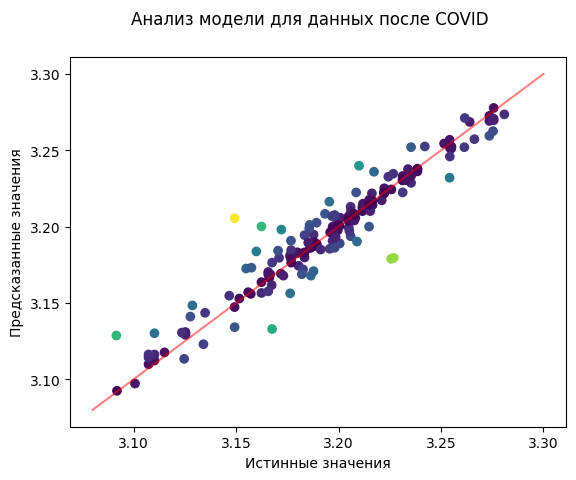

In [31]:
plt.plot(np.arange(3.08, 3.31, 0.01), np.arange(3.08, 3.31, 0.01), c = 'red', alpha = 0.5)

plt.scatter(y_test_post, predicted_values_post, 
            c = np.abs(y_test_post - predicted_values_post), cmap = 'viridis')

plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.suptitle("Анализ модели для данных после COVID", fontsize = 12)
plt.show()

HISTORY

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

with open('C:\\project\\history(1).pkl', 'rb') as file:
    history_pre = pickle.load(file)

with open('C:\\project\\history.pkl', 'rb') as file:
    history_post = pickle.load(file)

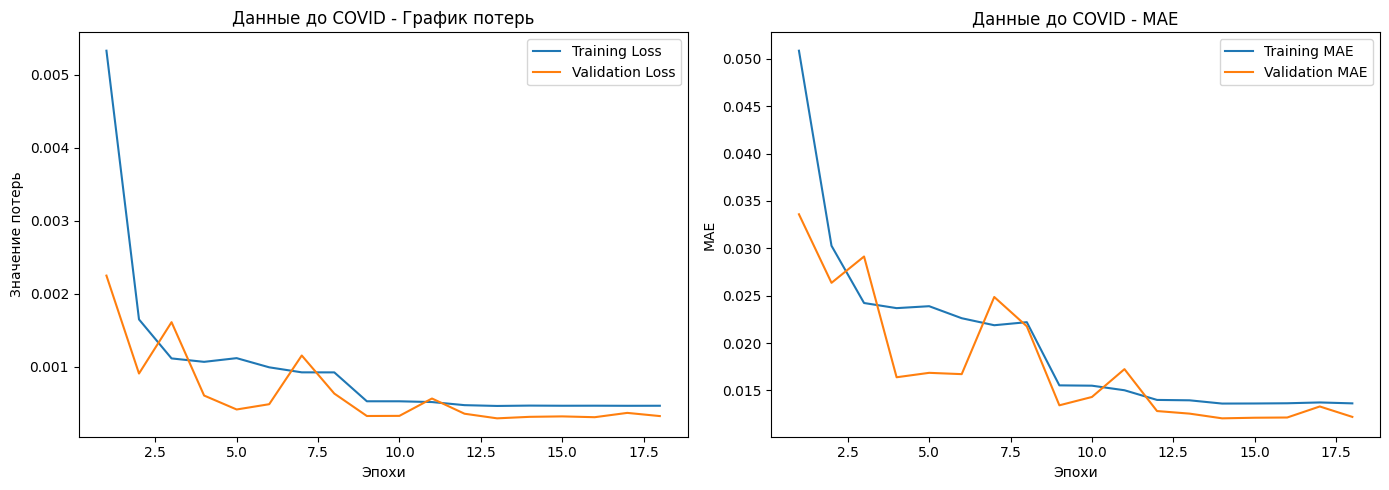

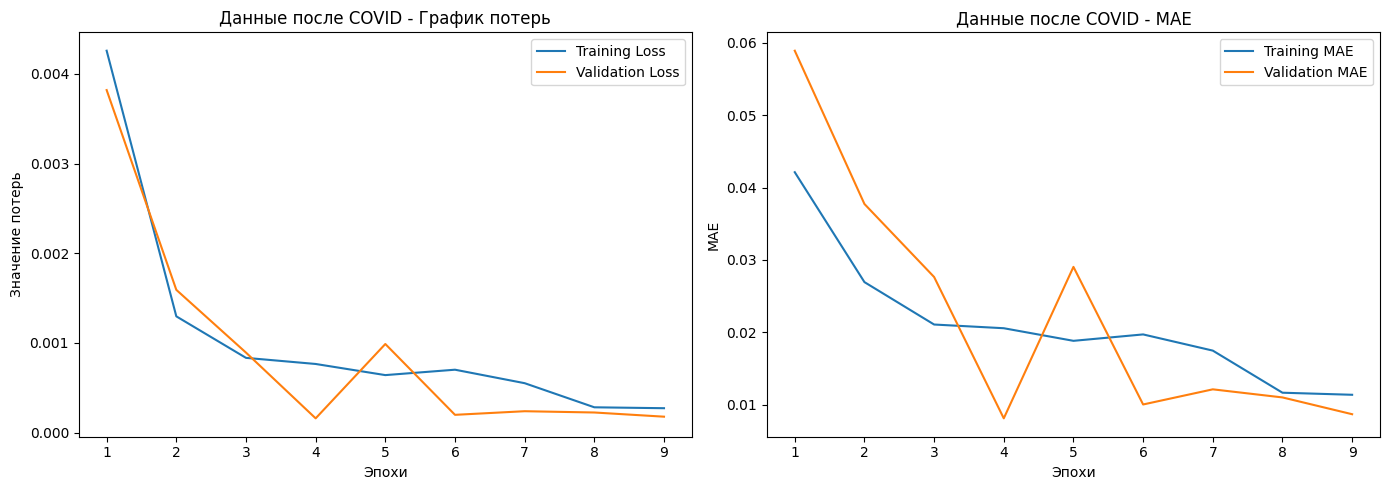

In [33]:
def plot_training_history(history, title):
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize = (14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], label = 'Training Loss')
    plt.plot(epochs, history['val_loss'], label = 'Validation Loss')
    plt.title(f'{title} - График потерь')
    plt.xlabel('Эпохи')
    plt.ylabel('Значение потерь')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['mae'], label='Training MAE')
    plt.plot(epochs, history['val_mae'], label='Validation MAE')
    plt.title(f'{title} - MAE')
    plt.xlabel('Эпохи')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_pre, 'Данные до COVID')

plot_training_history(history_post, 'Данные после COVID')

--------------

-----------

--------------------

In [1]:
import torch
import numpy as np

def generate_data(seq_len: int, num_samples: int):
    X = []
    y = []

    xx = np.linspace(0, 20 * np.pi, num_samples)
    xx = np.sin(xx)
    xx += np.random.normal(0, 0.2, size = len(xx))

    for i in range(num_samples - seq_len):
        X.append(xx[i: i + seq_len])
        y.append(xx[i + seq_len])
    # end for
    return np.array(X), np.array(y)
# end def

seq_len = 20 
num_samples = 1000 
input_size = 1
hidden_size = 50
output_size = 1
num_layers = 2
epochs = 200
batch_size = 2

X, y = generate_data(seq_len, num_samples)

X_train = torch.tensor(X[:800], dtype = torch.float32).unsqueeze(-1)
y_train = torch.tensor(y[:800], dtype = torch.float32).unsqueeze(-1)

X_test = torch.tensor(X[800:], dtype = torch.float32).unsqueeze(-1)
y_test = torch.tensor(y[800:], dtype = torch.float32).unsqueeze(-1)

In [2]:
from Models.ModelWrapper import ModelWrapper

args = {
    'hidden_size' : 20,
    'num_layers' : 3,
    'seq_len' : 30,
    'optimazer' : 'rmsprop',
    'use_batch_norm' : True,
    'dropout_rate' : 0.4
}

model = ModelWrapper(type = 'lstm', **args)

model.fit(X = X_train, 
          y = y_train, 
          epochs = epochs, 
          batch_size = batch_size, 
          verbose = True,
          X_val = X_test,
          y_val = y_test)
model.score(X = X_test, y = y_test)

Epoch [1/200], Loss: 0.34734594157605897, Val Loss: 0.07377421110868454
Epoch [2/200], Loss: 0.3030545021107537, Val Loss: 0.0843384638428688
Epoch [3/200], Loss: 0.30786607268353694, Val Loss: 0.06447842717170715
Epoch [4/200], Loss: 0.2927854088206368, Val Loss: 0.08069729059934616
Epoch [5/200], Loss: 0.2856060314291608, Val Loss: 0.11602146178483963
Epoch [6/200], Loss: 0.29851448605494624, Val Loss: 0.07323919981718063
Epoch [7/200], Loss: 0.3154781718814047, Val Loss: 0.11417464911937714
Epoch [8/200], Loss: 0.30986787611393085, Val Loss: 0.17121408879756927
Epoch [9/200], Loss: 0.3083148662433086, Val Loss: 0.06647207587957382
Epoch [10/200], Loss: 0.2808172949772597, Val Loss: 0.14796900749206543
Reduced learning rate to 0.0001
Epoch [11/200], Loss: 0.291175063153496, Val Loss: 0.060283079743385315
Epoch [12/200], Loss: 0.3041479505300231, Val Loss: 0.0632646307349205
Epoch [13/200], Loss: 0.283960446202218, Val Loss: 0.06430311501026154
Epoch [14/200], Loss: 0.2814280351787056

0.07303709536790848

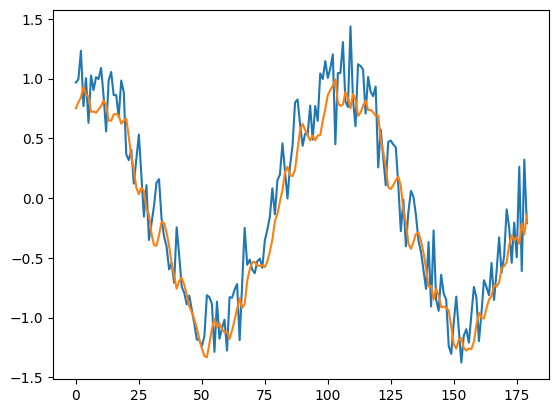

In [3]:
import matplotlib.pyplot as plt

pred = list(map(float, model.predict(X = X_test)))
true = list(map(float, y_test))

plt.plot(np.arange(len(pred)), true)
plt.plot(np.arange(len(pred)), pred)

In [4]:
from Models.ModelWrapper import ModelWrapper

args = {
    'hidden_size' : 20,
    'num_layers' : 3,
    'seq_len' : 20,
    'optimazer' : 'rmsprop',
    'use_batch_norm' : False,
    'dropout_rate' : 0
}

model = ModelWrapper(type = 'gru', **args)

model.fit(X = X_train, 
          y = y_train, 
          epochs = epochs, 
          batch_size = batch_size, 
          verbose = True,
          X_val = X_test,
          y_val = y_test
          )

model.score(X = X_test, y = y_test)

/home/masikol/main/UDSpredictor/usdvenv/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([180, 1])) that is different to the input size (torch.Size([180, 180, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/200], Loss: 0.08616484580532414, Val Loss: 1.801445484161377
Epoch [2/200], Loss: 0.060223008509419744, Val Loss: 0.7933511137962341
Epoch [3/200], Loss: 0.059517697603696434, Val Loss: 1.064537525177002
Epoch [4/200], Loss: 0.057326384367624994, Val Loss: 1.2124730348587036
Epoch [5/200], Loss: 0.0575250700997276, Val Loss: 1.3308392763137817
Epoch [6/200], Loss: 0.05636255264027568, Val Loss: 1.6694644689559937
Epoch [7/200], Loss: 0.05724767572733981, Val Loss: 1.1253280639648438
Epoch [8/200], Loss: 0.05656291295767005, Val Loss: 1.2489289045333862
Epoch [9/200], Loss: 0.055322000799133096, Val Loss: 1.3740042448043823
Reduced learning rate to 0.0001
Epoch [10/200], Loss: 0.051353266667283605, Val Loss: 0.92771315574646
Epoch [11/200], Loss: 0.05052541592216585, Val Loss: 1.0497937202453613
Epoch [12/200], Loss: 0.05024926223501097, Val Loss: 0.9654006361961365
Epoch [13/200], Loss: 0.05017665547958131, Val Loss: 0.9731292128562927
Epoch [14/200], Loss: 0.04999184920583502

/home/masikol/main/UDSpredictor/usdvenv/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([180, 1])) that is different to the input size (torch.Size([180, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


1.0473040342330933

In [5]:
from sklearn.metrics import mean_squared_error

pred = list(map(float, model.predict(X = X_test, steps = len(y_test))))
true = list(map(float, y_test))
mse = mean_squared_error(true, pred)
print(f'{mse:10f}')

  1.858404


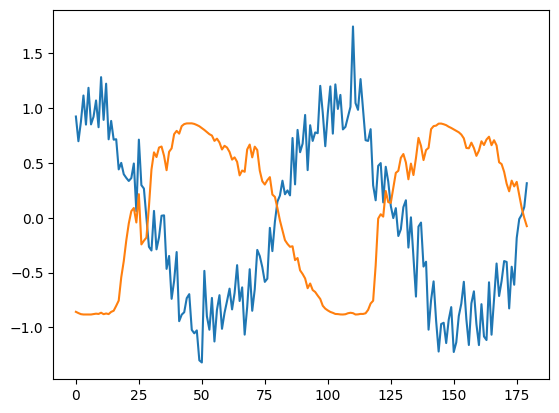

In [6]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(pred)), true)
plt.plot(np.arange(len(pred)), pred)

In [1]:
from DataLoaders.DataLoaderWrapper import DataLoaderWrapper

wrapper = DataLoaderWrapper(period = 'post', do_scale = True)
df = wrapper.get_data()
df

,Date,Cost
1587,2022-05-07,0.146454
1588,2022-05-08,0.146454
1589,2022-05-09,0.146454
1590,2022-05-10,0.148552
1591,2022-05-11,0.199748
...,...,...
2452,2024-09-18,0.829731
2453,2024-09-19,0.830571
2454,2024-09-20,0.846832
2455,2024-09-21,0.846832


In [1]:
from HyperparametersTuning.RNNHyperModel import RNNHyperModel

hyper_tuning = RNNHyperModel(do_scale = True,
                             type = 'gru',
                             hidden_size = 12,
                             num_layers = 1,
                             seq_len = 10,
                             optimazer = 'adam',
                             use_batch_norm = True,
                             dropout_rate = 0.5)

hyper_tuning.fit(0, 0)
hyper_tuning.score(0, 0)

{'do_scale': True, 'type': 'gru', 'num_layers': 1, 'hidden_size': 12, 'seq_len': 10, 'optimazer': 'adam', 'use_batch_norm': True, 'dropout_rate': 0.5}


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x769ec750f7f0>>
Traceback (most recent call last):
  File "/home/masikol/main/UDSpredictor/usdvenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Epoch [1/500], Loss: 0.6772802119905298, Val Loss: 0.6647622585296631
Epoch [2/500], Loss: 0.5259936804121191, Val Loss: 0.47532591223716736
Epoch [3/500], Loss: 0.4732347550717267, Val Loss: 0.38814547657966614
Epoch [4/500], Loss: 0.36975658617236395, Val Loss: 0.2369263917207718
Epoch [5/500], Loss: 0.34494733065366745, Val Loss: 0.1894768327474594
Epoch [6/500], Loss: 0.28695024482228537, Val Loss: 0.1210443377494812
Epoch [7/500], Loss: 0.24402118508111348, Val Loss: 0.18500278890132904
Epoch [8/500], Loss: 0.20660294050520117, Val Loss: 0.11380286514759064
Epoch [9/500], Loss: 0.19609762931411917, Val Loss: 0.03782444819808006
Epoch [10/500], Loss: 0.1651141977106983, Val Loss: 0.11090491712093353
Epoch [11/500], Loss: 0.12495002150535583, Val Loss: 0.21097427606582642
Epoch [12/500], Loss: 0.12250156158750708, Val Loss: 0.12799246609210968
Epoch [13/500], Loss: 0.11015981740572235, Val Loss: 0.18695230782032013
Epoch [14/500], Loss: 0.09867615811526775, Val Loss: 0.0700475871562

-0.020533373579382896

#multichart test

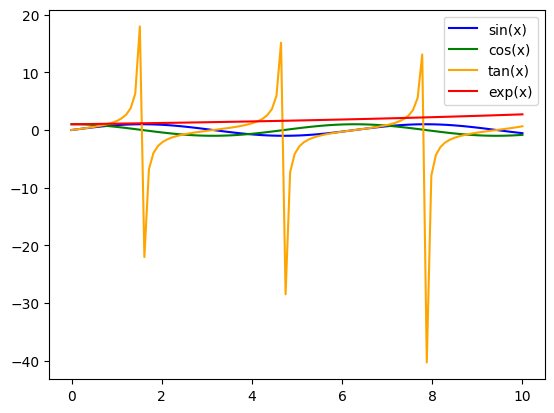

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from DrawingSystem.MultiChartDrawer import MultiChartDrawer  

drawer = MultiChartDrawer()

x1 = np.linspace(0, 10, 100)
y1 = np.sin(x1)
drawer.add_new_chart(x1, y1, label='sin(x)')

x2 = np.linspace(0, 10, 100)
y2 = np.cos(x2)
drawer.add_new_chart(x2, y2, label='cos(x)')

x3 = np.linspace(0, 10, 100)
y3 = np.tan(x3)
drawer.add_new_chart(x3, y3, label='tan(x)')

x4 = np.linspace(0, 10, 100)
y4 = np.exp(x4 / 10) 
drawer.add_new_chart(x4, y4, label='exp(x)')

drawer.plot()

# output_path = 'output/multi_chart.png'
# drawer.save(output_path)


#autocorr test

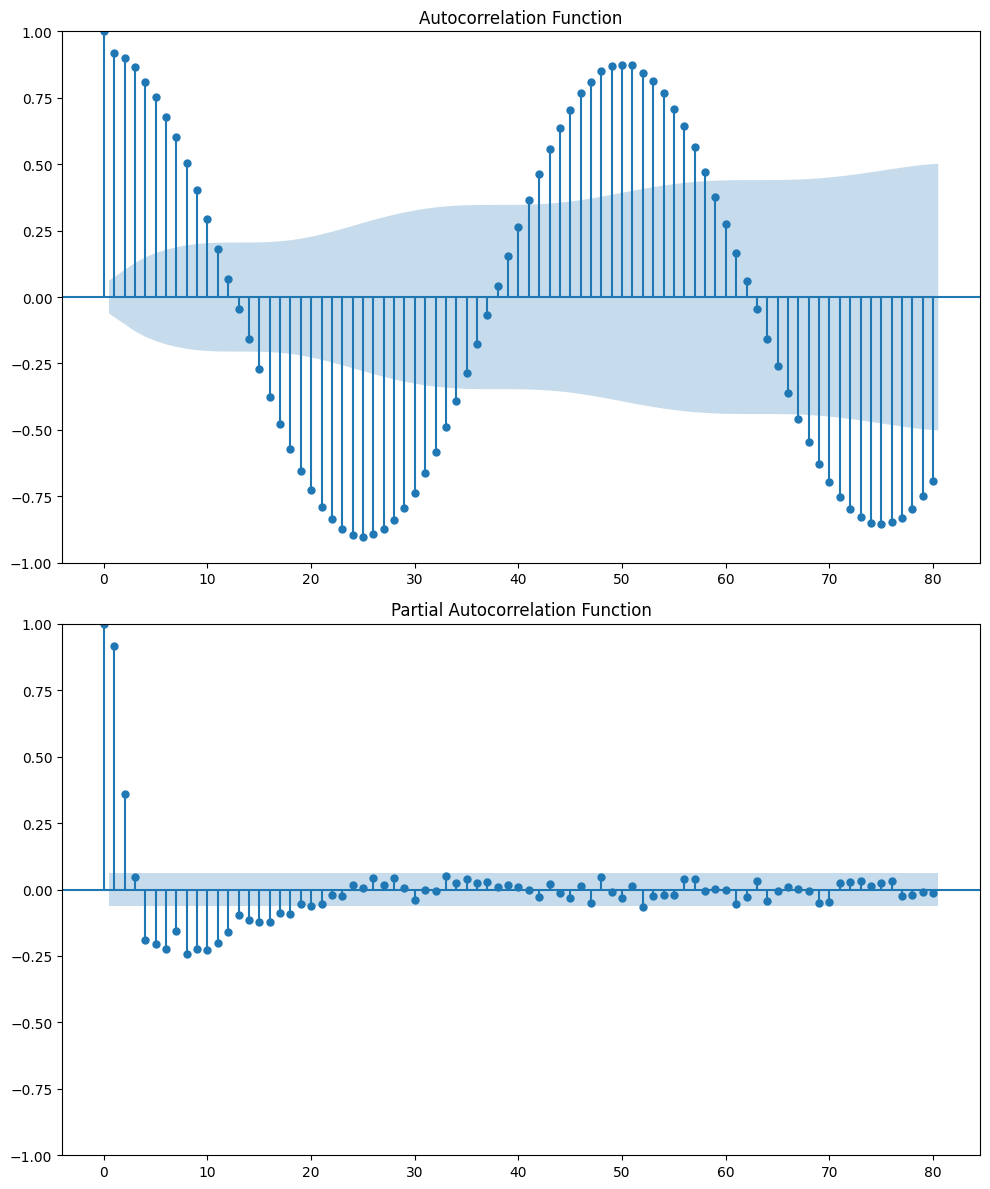

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from DrawingSystem.AutocorrelationDrawer import AutocorrelationDrawer  

def generate_test_data(n: int = 1000) -> pd.DataFrame:
    np.random.seed(0)  
    time = np.arange(n)
    
    seasonal_effect = 10 * np.sin(2 * np.pi * time / 50)
    noise = np.random.normal(loc=0, scale=2, size=n)
    data = seasonal_effect + noise
    
    return pd.DataFrame(data, columns=['Value'])

drawer = AutocorrelationDrawer()

test_data = generate_test_data()
drawer.set_data(test_data)

#drawer.set_lags(80)

drawer.plot()

# output_path = 'output/autocorrelation_plot.png'
# drawer.save(output_path)


#residue test

d:\FIN_PROJECT\UDSpredictor\src\DrawingSystem\ResidueDrawer.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = axs[0].scatter(x_true, residue, color = 'blue' , cmap = cmap)


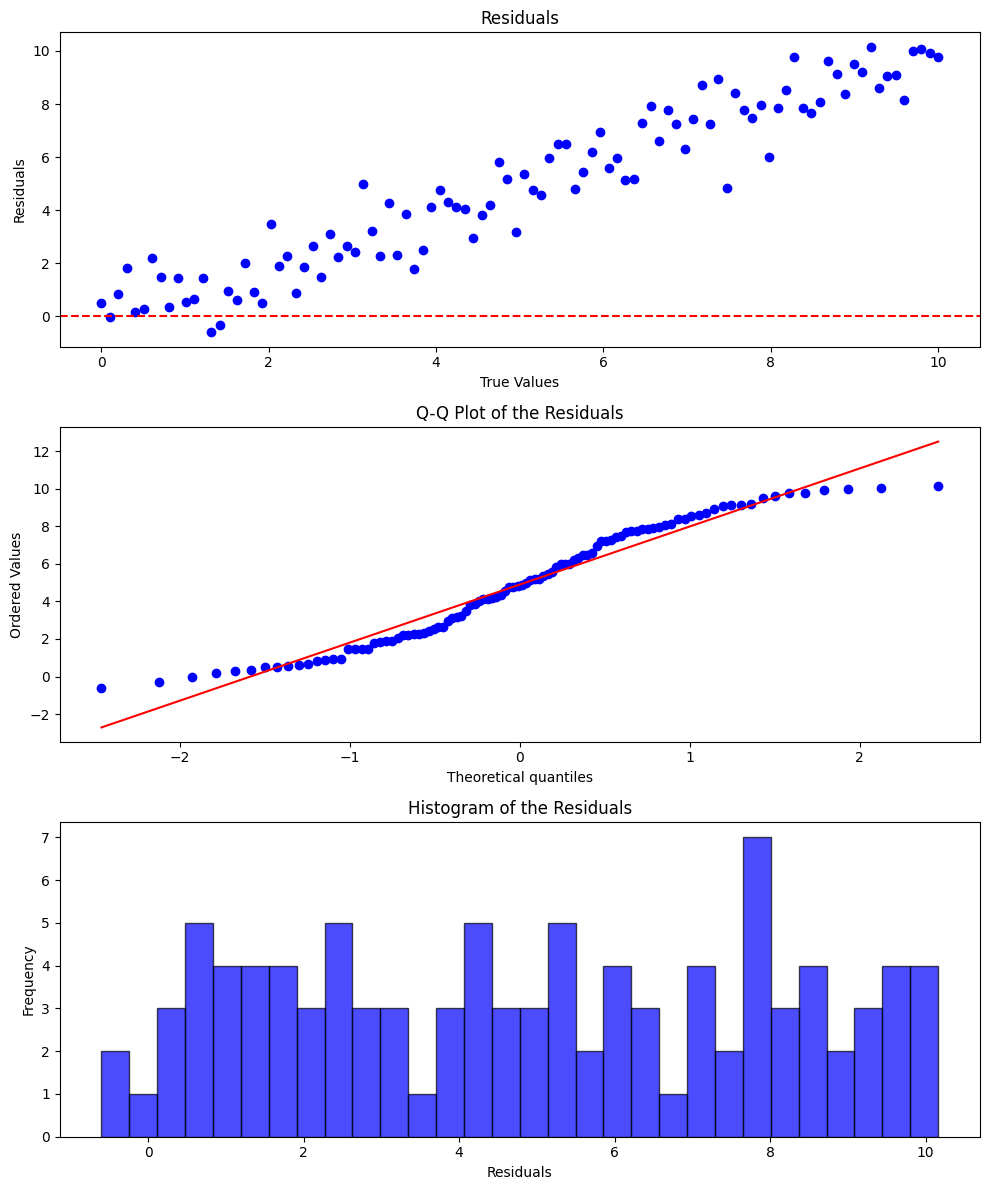

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from DrawingSystem.ResidueDrawer import ResidueDrawer  

def generate_test_data(n: int = 100) -> (np.ndarray, np.ndarray):
    np.random.seed(42)  
    x_true = np.linspace(0, 10, n)  
    noise = np.random.normal(0, 1, n)  
    x_predicted = x_true + noise 
    return x_true, x_predicted


drawer = ResidueDrawer()

x_true, x_predicted = generate_test_data()

drawer.add_residue(x_true, x_predicted)

drawer.plot()


# output_path = 'output/residue_plot.png'
# drawer.save(output_path)


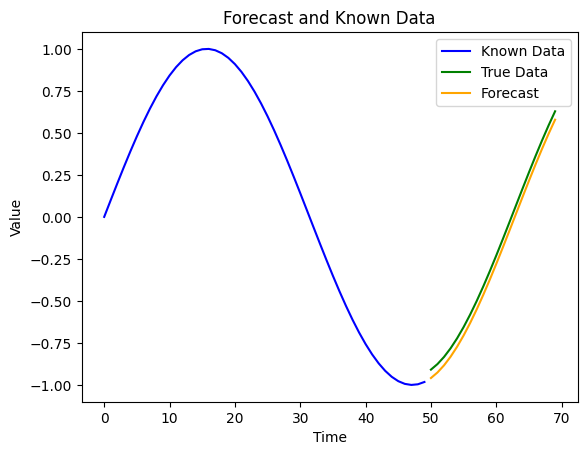

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DrawingSystem.ForecastDrawer import ForecastDrawer

forecast_drawer = ForecastDrawer()

time_known = np.arange(0, 50)  
values_known = np.sin(0.1 * time_known) 


time_forecast = np.arange(50, 70)  
values_forecast = np.sin(0.1 * time_forecast)  


time_true = time_forecast
values_true = np.sin(0.1 * time_true) + 0.05  

forecast_drawer.add_known_data(x=time_known, y=values_known, label='Known Data')

forecast_drawer.add_forecast_data(x_true=time_true, y_true=values_true, true_label='True Data', 
                                  x=time_forecast, y=values_forecast, label='Forecast')

forecast_drawer.plot()
